<a href="https://colab.research.google.com/github/CeeCeeOkeke/Portfolio-Projects/blob/main/Medical_Insurance_Cost%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score

In [91]:
insurance = pd.read_csv('/insurance.csv')   #Loading the dataframe

In [92]:
#loading the 5 rows of the dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#getting some information about the data
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#checking the total numbers of rows and columns
insurance.shape

(1338, 7)

In [16]:
#checking the total number of the missing values
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Visualisation

Since there is no missing values lets perform an Expository Data Analysis

In [10]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-22-121229a2a628>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(insurance['charges'], kde = True, color = 'c')


Text(0.5, 1.0, 'Distribution of Charges')

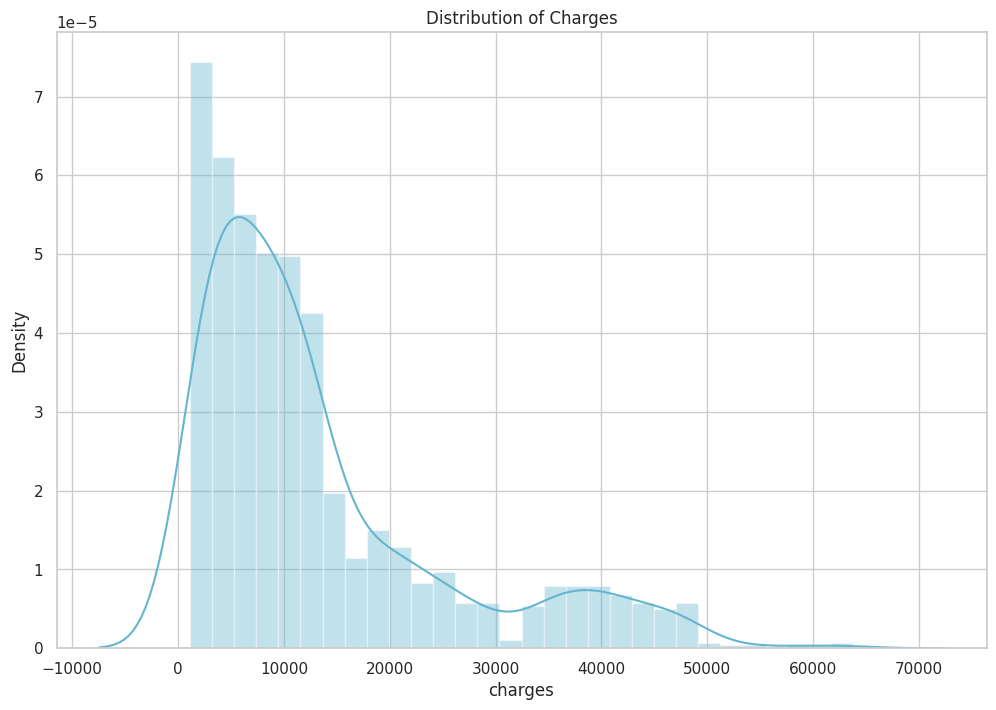

In [22]:
sns.set(style='whitegrid')
f,ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(insurance['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

The distribution is right skewed so to make it closer to normal distribution we apply natural log



<ipython-input-27-c174256a9392>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(np.log10(insurance['charges']), kde = True, color = 'g' )


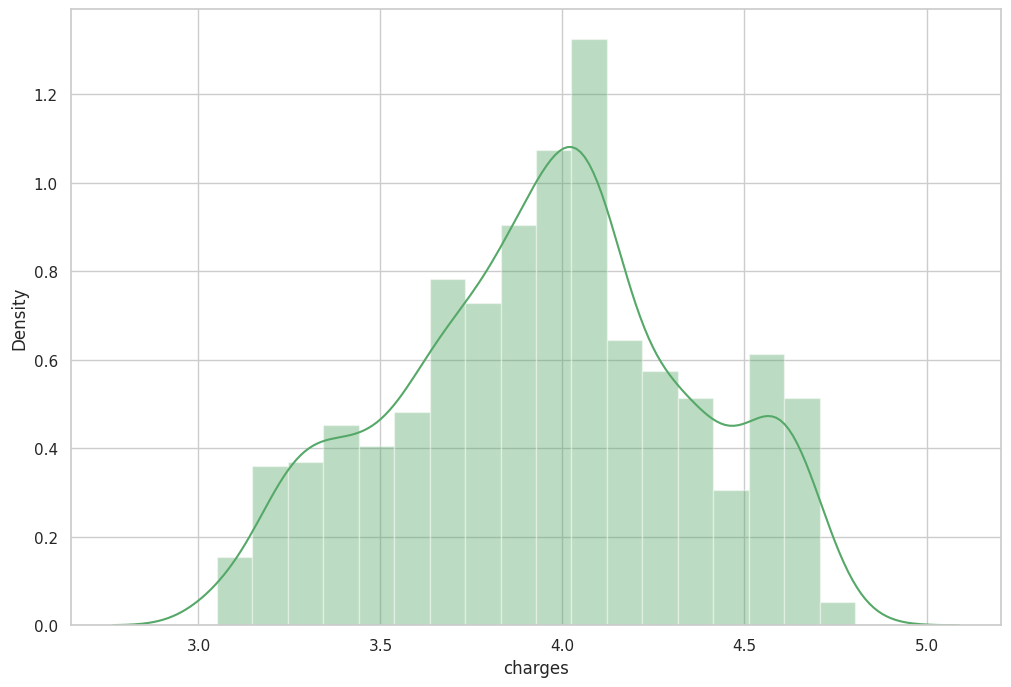

In [27]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(insurance['charges']), kde = True, color = 'g' )

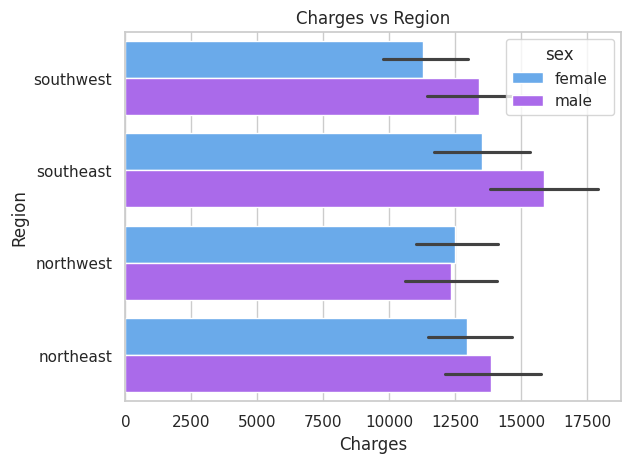

In [47]:
sns.barplot(x='charges', y='region', data=insurance, palette='cool', hue='sex')
plt.xlabel('Charges')
plt.ylabel('Region')
plt.title('Charges vs Region')
plt.show()

<Axes: xlabel='charges', ylabel='smoker'>

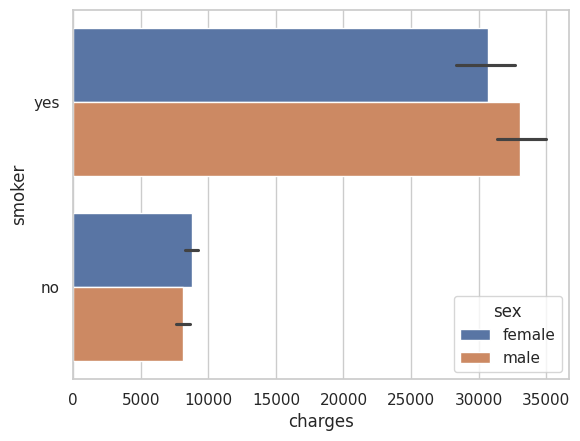

In [51]:
sns.barplot(x='charges', y='smoker', data=insurance, hue='sex')


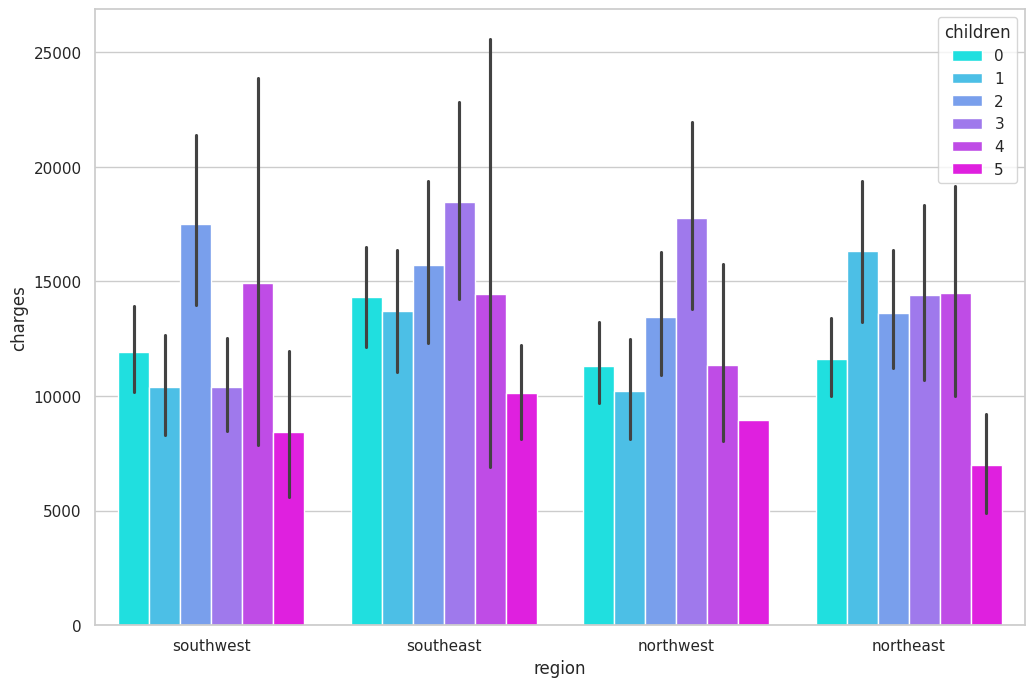

In [48]:

f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=insurance, palette='cool')

Analysing the medical charges by AGE, BMI, AGE according smoking factor  

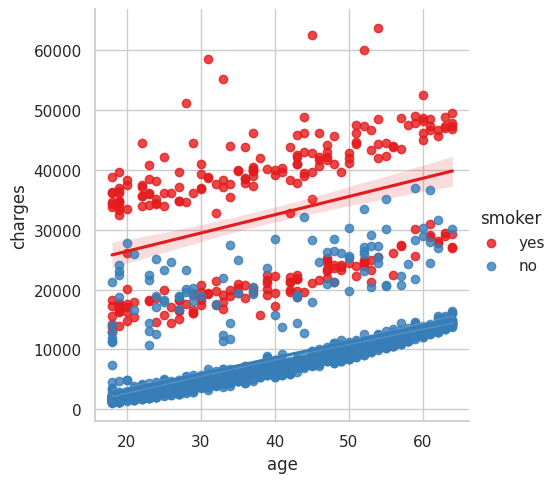

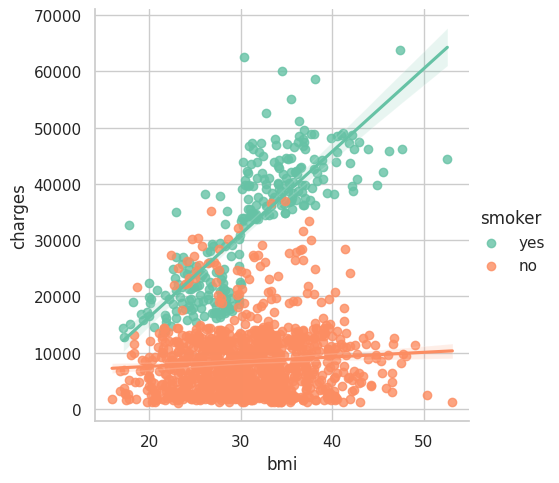

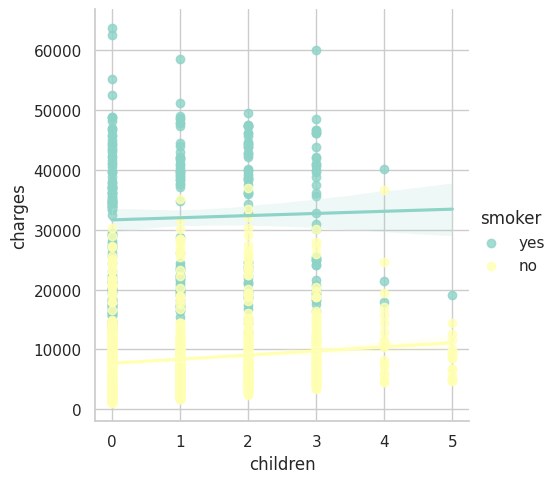

In [54]:
ax = sns.lmplot(x = 'age', y = 'charges', data=insurance, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=insurance, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=insurance, hue='smoker', palette='Set3')

To get the correlation we encode using LabelEncoder

In [63]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(insurance.sex.drop_duplicates())
insurance.sex = label.fit_transform(insurance.sex)
label.fit(insurance.smoker.drop_duplicates())
insurance.smoker = label.fit_transform(insurance.smoker)
label.fit(insurance.region.drop_duplicates())
insurance.region = label.fit_transform(insurance.region)
insurance.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

<Axes: >

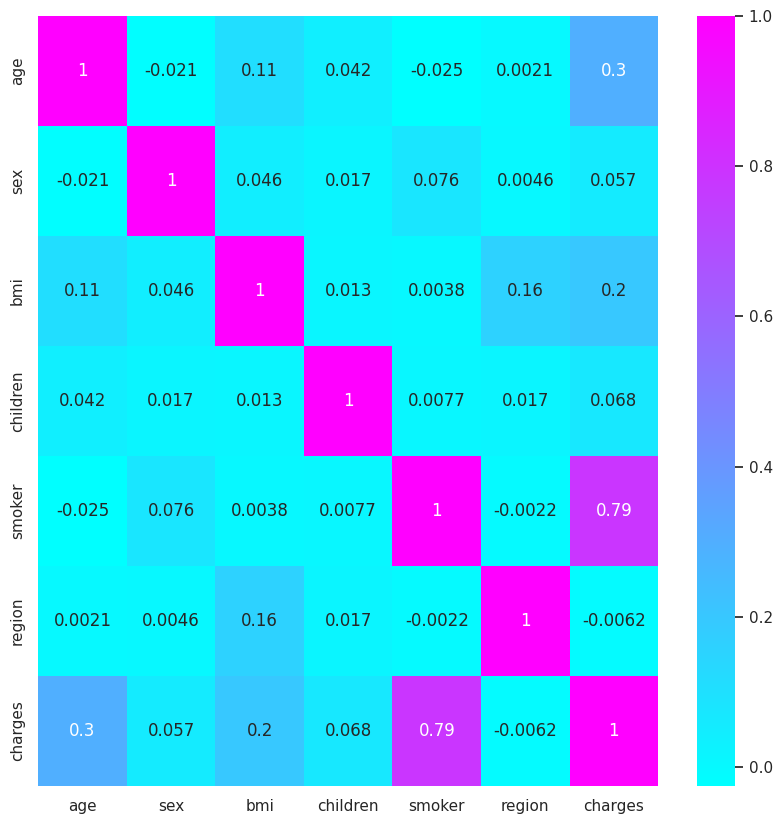

In [75]:
plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(insurance.corr(), annot=True, cmap='cool')


Model Training (Testing and Training)

In [76]:
#separating the axis
X = insurance.drop(columns='charges', axis=1)
Y = insurance['charges']

In [78]:
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [100]:
#Train Test Split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.3,random_state=2)

In [99]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (802, 6) (536, 6)


Training the Model

In [101]:
model = RandomForestRegressor()

In [102]:
#training the model
model.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation

In [113]:
#accuracy on training the model
from sklearn.metrics import r2_score
X_train_prediction = model.predict(X_train)
training_data_accuracy = r2_score(X_train_prediction,Y_train)

In [114]:
print(training_data_accuracy)

0.9736100594731047


In [118]:
#accuracy on testing the model
from sklearn.metrics import r2_score
X_test_prediction = model.predict(X_test)
testing_data_accuracy = r2_score(X_test_prediction,Y_test)

In [119]:
print(testing_data_accuracy)

0.821591973980742
